In [164]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
df0 = pd.read_csv('./data/processed/moscow_spb.csv')

In [304]:
def evaluate_correlation(df, target_col):
       import statistics
       cor = []
       for (columnName, columnData) in df.items():
           coef = statistics.correlation(columnData, target_col)
           cor.append((abs(coef), columnName))
       cor.sort(reverse=True)
       print(*cor, sep='\n')
       sortedColumns = list(map(lambda it: it[1], cor))[1:]
       print(sortedColumns)

C:\Users\super\AppData\Local\Temp\ipykernel_6948\2218750232.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.city = df.city.apply(lambda it: city_mapping[it])
C:\Users\super\AppData\Local\Temp\ipykernel_6948\2218750232.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.osm_city_nearest_name = df.osm_city_nearest_name.apply(lambda it: city_mapping2[it])


(1.0, 'per_square_meter_price')
(0.32767420595867147, 'osm_finance_points_in_0.01')
(0.3213024069645485, 'osm_finance_points_in_0.0075')
(0.31604443075607497, 'osm_finance_points_in_0.005')
(0.3132741027005676, 'osm_catering_points_in_0.005')
(0.29988232817432653, 'osm_city_nearest_population')
(0.298549203413635, 'osm_crossing_points_in_0.01')
(0.2930841816434732, 'osm_amenity_points_in_0.005')
(0.2841450187618277, 'osm_catering_points_in_0.0075')
(0.2831594652021154, 'osm_catering_points_in_0.001')
(0.28242830468475866, 'osm_crossing_points_in_0.0075')
(0.2780654447947091, 'osm_amenity_points_in_0.01')
(0.27759524396222807, 'osm_amenity_points_in_0.0075')
(0.27261090054606707, 'osm_catering_points_in_0.01')
(0.26583091126993774, 'osm_leisure_points_in_0.01')
(0.2655152132788503, 'osm_crossing_points_in_0.005')
(0.2597707139791097, 'osm_amenity_points_in_0.001')
(0.24728419265277027, 'osm_shops_points_in_0.005')
(0.24393092411421072, 'osm_shops_points_in_0.01')
(0.24230639153989977, '

C:\Users\super\AppData\Local\Temp\ipykernel_6948\2102313871.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.city = df.city.apply(lambda it: city_mapping[it])
C:\Users\super\AppData\Local\Temp\ipykernel_6948\2102313871.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.osm_city_closest_dist = df.apply(lambda it: f(it), axis=1)


(1.0, 'per_square_meter_price')
(0.21940819998437072, 'finance_points')
(0.2064670434556783, 'osm_city_nearest_population')
(0.20632860432883338, 'catering_points')
(0.19401205661242016, 'amenity_points')
(0.19096890624989316, 'realty_type_10')
(0.19027005513924444, 'crossing_points')
(0.16803810095352187, 'offices_points')
(0.16540493254218191, 'shops_points')
(0.1608782324624508, 'leisure_points')
(0.15676090448094146, 'culture_points')
(0.15378353168401246, 'healthcare_points')
(0.14855347394506543, 'osm_subway_closest_dist')
(0.1435842291643267, 'osm_city_closest_dist')
(0.14173142486763382, 'historic_points')
(0.13199848036370426, 'city')
(0.12556835063721897, 'realty_type_110')
(0.11627005241878317, 'hotels_points')
(0.10486484773432615, 'building_points')
(0.0952041728711657, 'realty_type_100')
['finance_points', 'osm_city_nearest_population', 'catering_points', 'amenity_points', 'realty_type_10', 'crossing_points', 'offices_points', 'shops_points', 'leisure_points', 'culture_po

,per_square_meter_price,city,osm_city_closest_dist,osm_subway_closest_dist,osm_city_nearest_population,realty_type_10,realty_type_100,realty_type_110,amenity_points,building_points,catering_points,crossing_points,culture_points,finance_points,healthcare_points,historic_points,hotels_points,leisure_points,offices_points,shops_points
0,17.143440,0,0.060267,-0.259196,-1.313556,0.0,0.0,1.0,-0.369688,0.022215,-0.419500,-0.476218,-0.527752,-0.718367,-0.494602,-0.500636,-0.243012,-0.531850,-0.699086,-0.261847
1,17.140066,1,-0.061503,-0.370535,-0.322607,1.0,0.0,0.0,-0.244903,-0.683785,-0.256237,0.609027,-0.050515,0.021807,0.041167,-0.023418,-0.443851,-0.895211,-0.359318,-0.232254
2,16.644414,1,0.042562,-0.209247,-0.322607,0.0,0.0,1.0,-0.123862,-0.683785,-0.167184,0.002716,-0.408443,-0.787758,0.338817,-0.553660,-0.316044,-0.453986,-0.404621,0.056281
3,17.283452,0,0.756577,-0.255507,1.037040,1.0,0.0,0.0,-0.314783,-0.401385,-0.449184,-0.608689,-0.487983,-0.695236,-0.296169,-0.518311,-0.334302,-0.402078,-0.189434,-0.099084
4,16.709324,0,-0.845642,-0.353403,1.037040,0.0,1.0,0.0,1.145200,0.234015,1.736315,1.724842,1.082924,3.051896,2.025497,0.135655,0.615117,0.117011,0.977101,0.768987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,18.086394,0,1.304816,-0.258701,1.037040,0.0,0.0,1.0,-0.352218,0.022215,-0.486289,-0.756446,-0.368673,-0.510193,-0.415228,-0.482961,-0.443851,-0.116579,-0.665109,-0.111414
96,17.252846,1,0.751809,1.262462,-0.322607,0.0,1.0,0.0,-0.588061,-0.683785,-0.460316,-0.297891,-0.527752,-0.741497,-0.732721,-0.500636,-0.443851,-0.843303,-0.517876,-0.449271
97,18.339374,0,0.870141,-0.226374,1.037040,0.0,1.0,0.0,0.017145,-0.542585,-0.337868,-0.929677,-0.487983,-0.394541,0.199914,-0.253189,-0.389077,2.426954,-0.585830,0.149993
98,17.953295,0,0.060683,-0.153922,1.037040,0.0,0.0,1.0,-0.256134,-0.471985,-0.467737,0.583552,-0.388558,-0.325149,-0.296169,-0.500636,-0.261270,0.246783,-0.212086,-0.202660


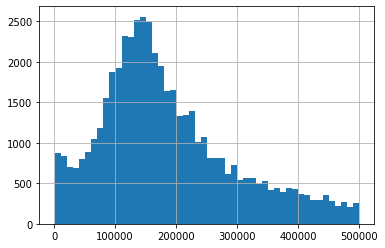

In [309]:
from math import log2

df0.per_square_meter_price.hist(bins=50)

ohe = OneHotEncoder()
oheRealtyType = ohe.fit_transform(df0[['realty_type']])
realtyTypeCategories = list(map(lambda x: "realty_type_" + str(x),  ohe.categories_[0]))
df0[realtyTypeCategories] = oheRealtyType.toarray()

points_types = ['amenity_points', 'building_points', 'catering_points', 'crossing_points', 'culture_points', 'finance_points', 'healthcare_points', 'historic_points', 'hotels_points', 'leisure_points', 'offices_points', 'shops_points']

for point_type in points_types:
       df0[point_type] = 16 * df0[f'osm_{point_type}_in_0.005'] + \
                         8 * df0[f'osm_{point_type}_in_0.0075'] + \
                         4 * df0[f'osm_{point_type}_in_0.01']
       if f'osm_{point_type}_in_0.001' in df0.columns:
              df0[point_type] += 32 * df0[f'osm_{point_type}_in_0.001']

columns = ['per_square_meter_price', 'city', 'osm_city_closest_dist', 'osm_subway_closest_dist', 'osm_city_nearest_population'] + realtyTypeCategories + points_types

city_mapping = dict(
    zip(
        pd.unique(df0.city),
        range(0, len(pd.unique(df0.city)))
    )
)
df = df0[columns]
df.city = df.city.apply(lambda it: city_mapping[it])

def f(it):
       if it.osm_city_closest_dist < it.osm_subway_closest_dist:
              return 2 * it.osm_subway_closest_dist
       else:
              return it.osm_city_closest_dist
df.osm_city_closest_dist = df.apply(lambda it: f(it), axis=1)
df = df.assign(
       per_square_meter_price = df.per_square_meter_price.apply(log2)
)

target_col = 'per_square_meter_price'
columns_to_scale = ['osm_city_closest_dist', 'osm_subway_closest_dist', 'osm_city_nearest_population'] + points_types
df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])

evaluate_correlation(df, df[target_col])

df.head(100)

In [312]:
mean = 0
mean1 = 0
n = 50
for _ in range(n):
       train, test = train_test_split(df, test_size=0.5)

       base_line = pd.Series([train.per_square_meter_price.mean()] * (len(train) + 1))

       train_x, train_y = train.drop(target_col, axis=1), train[target_col]
       test_x, test_y = test.drop(target_col, axis=1), test[target_col]



       model = LinearRegression()
       model.fit(train_x, train_y)

       pred = model.predict(test_x)
       mean += mean_absolute_percentage_error(2**test_y, 2**pred)
       mean1 += mean_absolute_percentage_error(2 ** test_y, 2 ** base_line)
print(mean / n)
print(mean1 / n)

1.1900541833709546
1.2477894473502262


In [ ]:
columns_initial = ['city', 'floor', 'id', 'lat', 'lng', 'osm_amenity_points_in_0.001',
       'osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075',
       'osm_amenity_points_in_0.01', 'osm_building_points_in_0.001',
       'osm_building_points_in_0.005', 'osm_building_points_in_0.0075',
       'osm_building_points_in_0.01', 'osm_catering_points_in_0.001',
       'osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075',
       'osm_catering_points_in_0.01', 'osm_city_closest_dist',
       'osm_city_nearest_name', 'osm_city_nearest_population',
       'osm_crossing_closest_dist', 'osm_crossing_points_in_0.001',
       'osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075',
       'osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001',
       'osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075',
       'osm_culture_points_in_0.01', 'osm_finance_points_in_0.001',
       'osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075',
       'osm_finance_points_in_0.01', 'osm_healthcare_points_in_0.005',
       'osm_healthcare_points_in_0.0075', 'osm_healthcare_points_in_0.01',
       'osm_historic_points_in_0.005', 'osm_historic_points_in_0.0075',
       'osm_historic_points_in_0.01', 'osm_hotels_points_in_0.005',
       'osm_hotels_points_in_0.0075', 'osm_hotels_points_in_0.01',
       'osm_leisure_points_in_0.005', 'osm_leisure_points_in_0.0075',
       'osm_leisure_points_in_0.01', 'osm_offices_points_in_0.001',
       'osm_offices_points_in_0.005', 'osm_offices_points_in_0.0075',
       'osm_offices_points_in_0.01', 'osm_shops_points_in_0.001',
       'osm_shops_points_in_0.005', 'osm_shops_points_in_0.0075',
       'osm_shops_points_in_0.01', 'osm_subway_closest_dist',
       'osm_train_stop_closest_dist', 'osm_train_stop_points_in_0.005',
       'osm_train_stop_points_in_0.0075', 'osm_train_stop_points_in_0.01',
       'osm_transport_stop_closest_dist', 'osm_transport_stop_points_in_0.005',
       'osm_transport_stop_points_in_0.0075',
       'osm_transport_stop_points_in_0.01', 'per_square_meter_price',
       'reform_count_of_houses_1000', 'reform_count_of_houses_500',
       'reform_house_population_1000', 'reform_house_population_500',
       'reform_mean_floor_count_1000', 'reform_mean_floor_count_500',
       'reform_mean_year_building_1000', 'reform_mean_year_building_500',
       'region', 'total_square', 'street', 'date', 'realty_type']